# Extract

A Convolutional Network is used to extract relevant features from the images.

# Setup

Check if extraction done

In [ ]:
assert not Path(DIR_DATA / 'COCO/train/features.pt').exists(), 'Extraction done already. Move on!'

## Imports

In [2]:
import magnet as mag

Accelerating your code on shiney new Tesla P100-PCIE-16GB GPU.


In [3]:
import torch

In [4]:
from captioner.data import get_extract_dataloaders
from captioner.extract import Extractor
from captioner.utils import show_coco
from captioner.hparams import image_shape, architecture, num_workers
from captioner.hparams import extractor_batch_size as batch_size

## Preparations

In [5]:
DIR_DATA = DIR_DATA / 'COCO'

## Load Data

In [ ]:
dataloader = get_extract_dataloaders(DIR_DATA, image_shape, batch_size, num_workers)

Take a look at the images

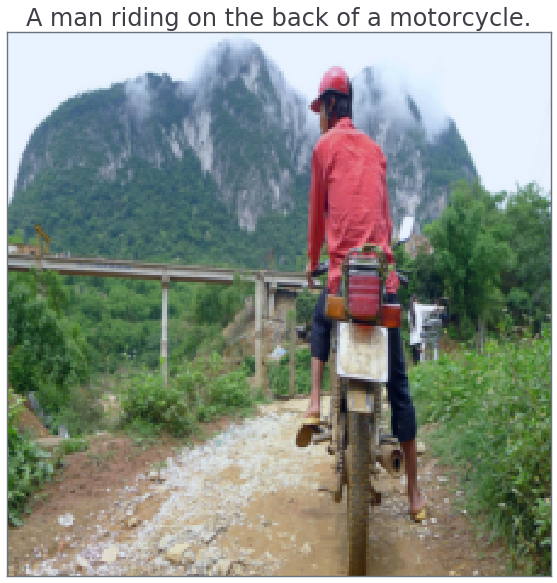

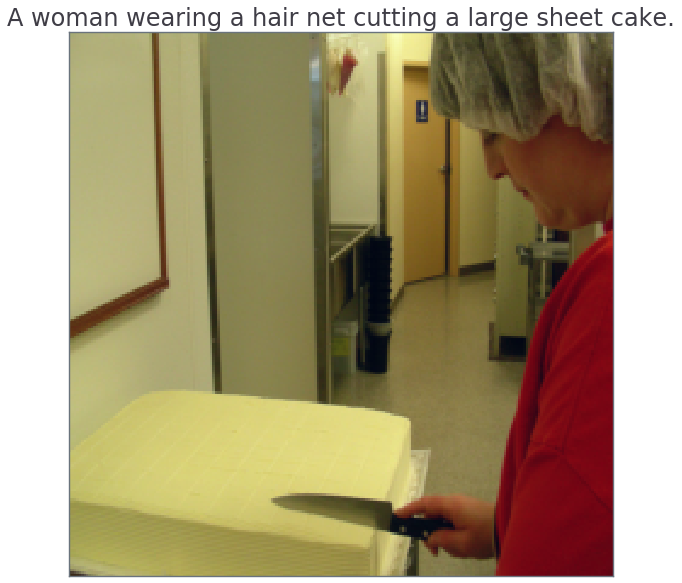

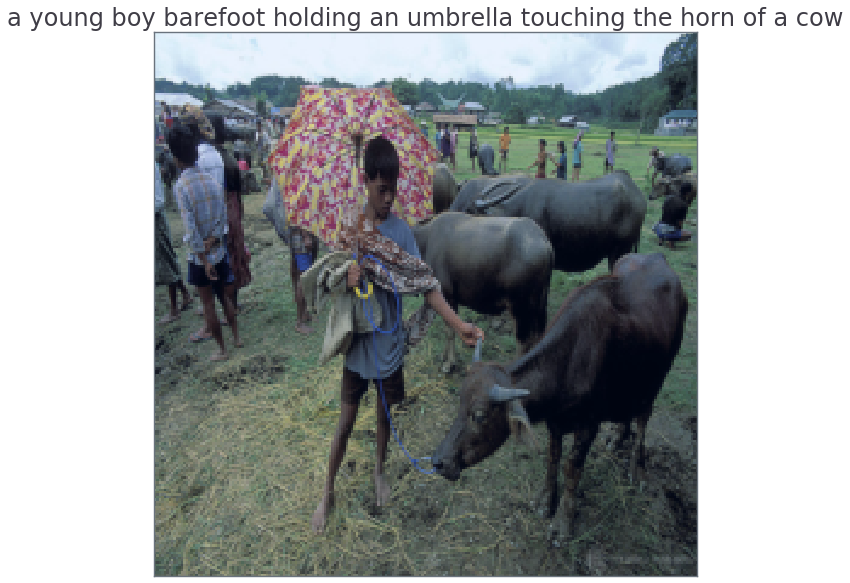

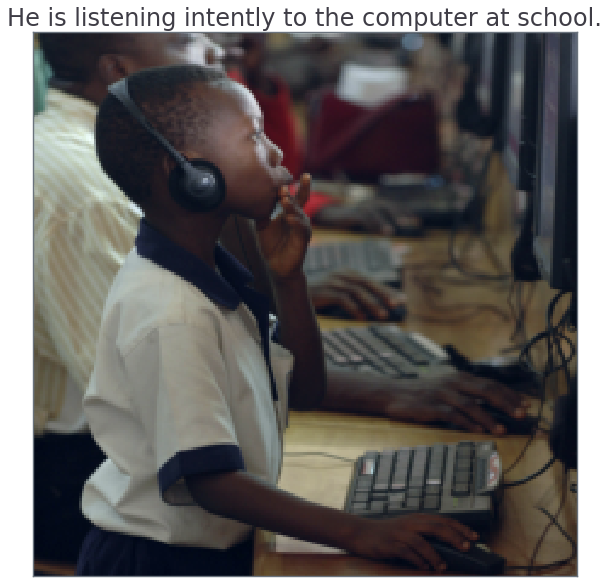

In [20]:
img, captions = next(iter(dataloader['train']))
show_coco(img[:4], captions[:4])

# Extract Features

The extractor is a pretrained CNN whose head is removed.
We're simply looking to get the features that enabled the CNN to do the task that it was trained on well.

In this case, we use the [ResNet](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035).

![ResNet](../assets/resnet.png)

In [9]:
extractor = Extractor(architecture)

In [ ]:
for mode in ('val', 'train'):
    with mag.eval(extractor): features = extractor(dataloader[mode])
    torch.save(features, DIR_DATA / mode / 'features.pt')